In [32]:
import tensorflow as tf
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

savedir = '/Users/moritzhauschulz/oxford_code/tdl/pinnacle_2024/pinnacle_code/plots_meh'


In [66]:
def debug_tensorboard_tags(logdir):
    ea = event_accumulator.EventAccumulator(
        logdir,
        size_guidance={
            'histograms': 0,
            'scalars': 0,
            'distributions': 0
        }
    )
    ea.Reload()
    
    # Print all available tags
    for tag_type, tags in ea.Tags().items():
        print(f"\n{tag_type}:")
        for tag in tags:
            print(f"  - {tag}")
    
    return ea

# Test with one directory first
test_dir = "/Users/moritzhauschulz/oxford_code/tdl/pinnacle_2024/pinnacle_code/al_pinn_results/burgers-1d{0.02}_pb-20_ic/nn-None-4-128_adam_bcsloss-1.0_budget-300-100-0/sampling_alignment_scale-none_mem_autoal/20250106010453-65/tensorboard"
ea = debug_tensorboard_tags(test_dir)


images:
  - predict_plots
  - res_error_plots
  - eigbasis_plots
  - Gradients/distributions_step_1000
  - Gradients/distributions_step_2000
  - Gradients/distributions_step_3000
  - Gradients/distributions_step_4000
  - Gradients/distributions_step_5000
  - Gradients/distributions_step_6000
  - Gradients/distributions_step_7000
  - Gradients/distributions_step_8000
  - Gradients/distributions_step_9000
  - Gradients/distributions_step_10000

audio:

histograms:
  - Gradients/pde_grads
  - Gradients/bc_grads

scalars:
  - Loss/train
  - Loss/test_res
  - Loss/test_err
  - Points/num_res
  - Points/num_bcs_0
  - Points/num_bcs_1
  - Coef_eigvects/new_pts
  - Coef_eigvects/returned_pts
  - Coef_eigvects/F_ratio

distributions:
  - Gradients/pde_grads
  - Gradients/bc_grads

tensors:
  - args/text_summary

graph:


TypeError: 'bool' object is not iterable

In [60]:

def extract_var(logdir, var, prefix='Loss', kind=None):
    # Load events
    ea = event_accumulator.EventAccumulator(
        logdir,
        size_guidance={
            event_accumulator.SCALARS: 0,
            event_accumulator.HISTOGRAMS: 0
        }
    )
    ea.Reload()
    
    if kind == 'histograms':
        # Extract histogram data
        histo = ea.Histograms(f'{prefix}/{var}')
        return histo
    else:
        # Extract scalar data as before
        scalar_events = ea.Scalars(f'{kind}/{var}')
        scalar_df = pd.DataFrame([
            {'step': event.step, var: event.value}
            for event in scalar_events
        ])
        return scalar_df


    


In [58]:
# PLOT TRAINING CURVES
logdirs = {
    'MultiAdam': "/Users/moritzhauschulz/oxford_code/tdl/pinnacle_2024/pinnacle_code/al_pinn_results/burgers-1d{0.02}_pb-20_ic/nn-None-4-128_multiadam_bcsloss-1.0_budget-300-100-0/sampling_alignment_scale-none_mem_autoal/20250104165112-93/tensorboard/",
    'PINNacle':"/Users/moritzhauschulz/oxford_code/tdl/pinnacle_2024/pinnacle_code/al_pinn_results/burgers-1d{0.02}_pb-20_ic/nn-None-4-128_adam_bcsloss-1.0_budget-300-100-0/sampling_alignment_scale-none_mem_autoal/20250105210815-51/tensorboard",
    'NTK-weights':'/Users/moritzhauschulz/oxford_code/tdl/pinnacle_2024/pinnacle_code/al_pinn_results/burgers-1d{0.02}_pb-20_ic/nn-None-4-128_adam_bcsloss-auto_budget-300-100-0/sampling_alignment_scale-none_mem_autoal/20250105160508-4/tensorboard'
}
dfs = {}

title_dict = {'train': 'Training Loss', 'test_err': 'Test Error', 'test_res': 'Test Residual'}

for var in ['train', 'test_err', 'test_res']:
    for key in logdirs.keys():
        dfs[key] = extract_var(logdirs[key], var)

    # Create a colorblind-friendly color cycle
    colors = plt.cycler('color', ['#0077BB',  # blue
                                    '#EE7733',    # orange
                                    '#009988',    # teal
                                    '#CC3311',    # red
                                    '#33BBEE',    # cyan
                                    '#EE3377'])   # magenta

    # Set as default color cycle
    plt.rcParams['axes.prop_cycle'] = colors

    # To use as iterator:
    color_cycle = colors()

    # Plot
    plt.figure(figsize=(10,6))
    for key in logdirs.keys():
        color = next(color_cycle)
        df = dfs[key]
        plt.plot(df['step'], df[var], label=key, color=color['color'])
    plt.yscale('log')
    plt.xlabel('Training Step', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.title(f'{title_dict[var]} over Time', fontsize=18)
    plt.legend(fontsize=16)

    # Configure tick formatters
    ax = plt.gca()
    # formatter = ScalarFormatter()
    # formatter.set_scientific(True)
    # formatter.set_powerlimits((-3,3))

    # ax.xaxis.set_major_formatter(formatter)
    # ax.yaxis.set_major_formatter(ScalarFormatter())

    # Adjust tick parameters
    ax.tick_params(axis='both', which='major', labelsize=14, length=6, width=1)
    ax.tick_params(axis='both', which='minor', labelsize=12, length=4, width=1)

    plt.savefig(f'{savedir}/{var}_curve.png')
    plt.close()

TypeError: list indices must be integers or slices, not str

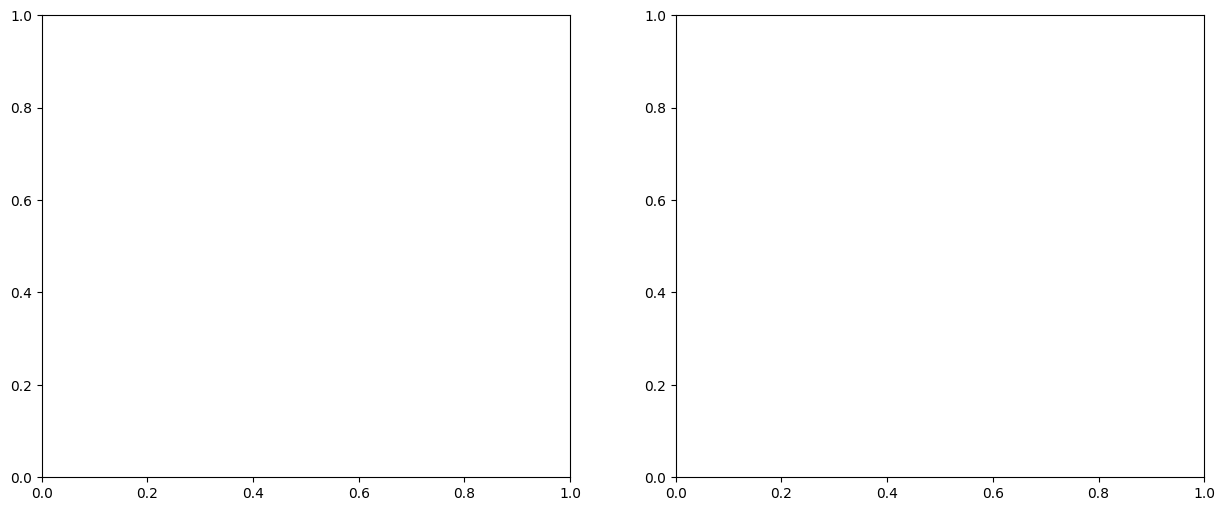

In [67]:
#PLOT TRAINING GRADS
logdirs = {
    'MultiAdam': "/Users/moritzhauschulz/oxford_code/tdl/pinnacle_2024/pinnacle_code/al_pinn_results/burgers-1d{0.02}_pb-20_ic/nn-None-4-128_adam_bcsloss-1.0_budget-300-100-0/sampling_alignment_scale-none_mem_autoal/20250106010453-65/tensorboard",
    #'PINNacle': "/Users/moritzhauschulz/oxford_code/tdl/pinnacle_2024/pinnacle_code/al_pinn_results/burgers-1d{0.02}_pb-20_ic/nn-None-4-128_adam_bcsloss-1.0_budget-300-100-0/sampling_alignment_scale-none_mem_autoal/20250105233430-25/tensorboard"
    # 'NTK-weights': 
}

# Create a colorblind-friendly color cycle
colors = plt.cycler('color', ['#0077BB',  # blue
                            '#EE7733',    # orange
                            '#009988',    # teal
                            '#CC3311'])   # red

# Set as default color cycle
plt.rcParams['axes.prop_cycle'] = colors
color_cycle = colors()

pde_dfs, bc_dfs = {}, {}
for key in logdirs.keys():
    pde_dfs[key] = extract_var(logdirs[key], 'pde_grads', prefix='Gradients', kind='histograms')
    bc_dfs[key] = extract_var(logdirs[key], 'bc_grads', prefix='Gradients', kind='histograms')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot PDE gradients
for key in logdirs.keys():
    color = next(color_cycle)
    # ax1.hist(pde_dfs[key]['pde_grads'], 
    #          bins=200, 
    #          alpha=0.5, 
    #          density=True,
    #          label=key,
    #          color=color['color'])
    ax1.hist(
        pde_dfs[key]['pde_grads'].bucket_limit[:-1],
        weights=pde_dfs[key]['pde_grads'].bucket,
        bins=len(pde_dfs[key]['pde_grads'].bucket),
        density=True,
        label=key,
        color=color['color'])
    

# Reset color cycle
color_cycle = colors()

# Plot BC gradients
for key in logdirs.keys():
    color = next(color_cycle)
    ax2.hist(
        pde_dfs[key]['bc_grads'].bucket_limit[:-1],
        weights=pde_dfs[key]['bc_grads'].bucket,
        bins=len(pde_dfs[key]['bc_grads'].bucket),
        density=True,
        label=key,
        color=color['color'])

ax1.set_title('PDE Loss Gradients Distribution')
ax2.set_title('BC Loss Gradients Distribution')
ax1.set_xlabel('Gradient Value')
ax2.set_xlabel('Gradient Value')
ax1.set_ylabel('Density')
ax2.set_ylabel('Density')
ax1.legend()
ax2.legend()
plt.tight_layout()

plt.savefig(f'{savedir}/gradient_distributions_comparison.png')
plt.close()
